# Using Spark Preprocessing Techniques for Coral Reefs

### Creating Spark Dataframes

In [ ]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
import seaborn as sns 
from matplotlib import pyplot as plt
from pyspark.sql import Row
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import StructType, StructField, IntegerType, StringType


spark = SparkSession.builder.enableHiveSupport().getOrCreate() #enable hive in spark
conf = SparkConf().setAppName("SparkRDD Mini Project")
sc = SparkContext.getOrCreate()

In [4]:
schema = StructType([
             StructField('Reef.ID', IntegerType()),
             StructField('Reef.Name', StringType()),
             StructField('Ocean', StringType()),
			 StructField('COUNTRY', StringType()),
			 StructField('State.Province.Island', StringType()),
			 StructField('City.Town', StringType()),
			 StructField('YEAR', StringType()),
			 StructField('Date', StringType()),
			 StructField('Depth', StringType()),
			 StructField('Organism.Code', StringType()),
			 StructField('S1', StringType()),
			 StructField('S2', StringType()),
			 StructField('S3', StringType()),
			 StructField('S4', StringType()),
			 StructField('Errors', StringType()),
			 StructField('What.errors.', StringType()),
			 StructField('Average_bleaching', StringType()),
			 StructField('ClimSST', StringType()),
			 StructField('Temperature_Kelvin', StringType()),
			 StructField('Temperature_Mean', StringType()),
			 StructField('Temperature_Minimum', StringType()),
			 StructField('Temperature_Maximum', StringType()),
			 StructField('Temperature_Kelvin_Standard_Deviation', StringType()),
			 StructField('Windspeed', StringType()),
			 StructField('SSTA', StringType()),
			 StructField('SSTA_Standard_Deviation', StringType()),
			 StructField('SSTA_Mean', StringType()),
			 StructField('SSTA_Minimum', StringType()),
			 StructField('SSTA_Maximum', StringType()),
			 StructField('SSTA_Frequency', StringType()),
			 StructField('SSTA_Frequency_Standard_Deviation', StringType()),
			 StructField('SSTA_FrequencyMax', StringType()),
			 StructField('SSTA_FrequencyMean', StringType()),
			 StructField('SSTA_DHW', StringType()),
			 StructField('SSTA_DHW_Standard_Deviation', StringType()),
			 StructField('SSTA_DHWMax', StringType()),
			 StructField('SSTA_DHWMean', StringType()),
			 StructField('TSA', StringType()),
			 StructField('TSA_Standard_Deviation', StringType()),
			 StructField('TSA_Minimum', StringType()),
			 StructField('TSA_Maximum', StringType()),
			 StructField('TSA_Mean', StringType()),
			 StructField('TSA_Frequency', StringType()),
			 StructField('TSA_Frequency_Standard_Deviation', StringType()),
			 StructField('TSA_FrequencyMax', StringType()),
			 StructField('TSA_FrequencyMean', StringType()),
			 StructField('TSA_DHW', StringType()),
			 StructField('TSA_DHW_Standard_Deviation', StringType()),
			 StructField('TSA_DHWMax', StringType()),
			 StructField('TSA_DHWMean', StringType()),
			 StructField('Region', StringType()),
			 StructField('Diversity', StringType()),
			 StructField('rate_of_SST_change', StringType()),
			 StructField('LON', StringType()),
			 StructField('LAT', StringType()),

    
    

    
			 ])
spark_df2 = spark.read.csv("reef check.csv", schema=schema,header=True)
#spark_df2.createOrReplaceTempView("mytempTable2")
#spark.sql("use coraltrial");
#table2=spark.sql("select * from coraltrial2")

In [ ]:
schema = StructType([
             StructField('ID', IntegerType()),
             StructField('REGION', StringType()),
             StructField('SUBREGION', StringType()),
			 StructField('COUNTRY', StringType()),
			 StructField('LOCATION', StringType()),
			 StructField('LAT', StringType()),
			 StructField('LON', StringType()),
			 StructField('MONTH', StringType()),
			 StructField('YEAR', StringType()),
			 StructField('DEPTH', StringType()),
			 StructField('SEVERITY_CODE', StringType()),
			 StructField('BLEACHING_SEVERITY', StringType()),
			 StructField('CORAL_FAMILY', StringType()),
			 StructField('CORAL_SPECIES', StringType()),
			 StructField('PERCENTAGE_AFFECTED', StringType()),
			 StructField('BLEACHING_DURATION', StringType()),
			 StructField('MORTALITY_CODE', StringType()),
			 StructField('MORTALITY', StringType()),
			 StructField('RECOVERY_CODE', StringType()),
			 StructField('RECOVERY', StringType()),
			 StructField('SURVEY_TYPE', StringType()),
			 StructField('SURVEY_AREA', StringType()),
			 StructField('WATER_TEMPERATURE', StringType()),
			 StructField('OTHER_FACTORS', StringType()),
			 StructField('REMARKS', StringType()),
			 StructField('SOURCE', StringType()),
			 StructField('REFERENCE_CODE', StringType()),
			 StructField('COUNTRY_CODE', StringType()),
			 ])
import pandas as pd
df=pd.read_csv("Coral.csv")
spark_df1 = spark.createDataFrame(df,schema=schema)

#spark_df1 = spark.read.csv("CoralBleaching.csv", schema=schema,header=True)

### Preprocessing

In [40]:
columns1 = ['LON','LAT'.'WATER_TEMPERATURE','DEPTH','PERCENTAGE_AFFECTED','CORAL_SPECIES','MORTALITY_CODE','BLEACHING_DURATION','MORTALITY','RECOVERY','SURVEY_TYPE','SURVEY_AREA','OTHER_FACTORS','LOCATION','SUBREGION','ID','REMARKS','SOURCE','REFERENCE_CODE','COUNTRY_CODE','BLEACHING_SEVERITY','CORAL_FAMILY']
columns2=['Reef.ID', 'Reef.Name', 'State.Province.Island',
       'City.Town', 'Date', 'Organism.Code', 'S1', 'S2', 'S3',
       'S4', 'Errors', 'What.errors.',
        'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
        'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean',
         'Temperature_Minimum',
       'Temperature_Maximum']

spark_df1=spark_df1.drop(*columns1)
spark_df2=spark_df2.drop(*columns2)

In [41]:
spark_df1.drop_duplicates
spark_df2.drop_duplicates
df1=spark_df1.join(spark_df2,on=['COUNTRY','YEAR'])
df1.count()
df=df1.toPandas()

In [42]:
df.columns

Index(['COUNTRY', 'YEAR', 'REGION', 'MONTH', 'SEVERITY_CODE', 'RECOVERY_CODE',
       'Ocean', 'Depth', 'Average_bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Kelvin_Standard_Deviation',
       'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean',
       'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
       'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
       'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation',
       'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'Region',
       'Diversity', 'rate_of_SST_change', 'LON', 'LAT'],
      dtype='object')

In [43]:
df1=df1.filter(df1.SEVERITY_CODE !=-1).show(30)

+-------+----+------+-----+-------------+-------------+--------+-----+-----------------+-------+------------------+----------------+-------------------------------------+---------+-----------+-----------------------+---------+------------+------------+--------------+---------------------------------+-----------------+------------------+--------+---------------------------+-----------+------------+------------+----------------------+-------------+--------------------------------+------+---------+------------------+------------+------------+
|COUNTRY|YEAR|REGION|MONTH|SEVERITY_CODE|RECOVERY_CODE|   Ocean|Depth|Average_bleaching|ClimSST|Temperature_Kelvin|Temperature_Mean|Temperature_Kelvin_Standard_Deviation|Windspeed|       SSTA|SSTA_Standard_Deviation|SSTA_Mean|SSTA_Minimum|SSTA_Maximum|SSTA_Frequency|SSTA_Frequency_Standard_Deviation|SSTA_FrequencyMax|SSTA_FrequencyMean|SSTA_DHW|SSTA_DHW_Standard_Deviation|SSTA_DHWMax|SSTA_DHWMean|         TSA|TSA_Standard_Deviation|TSA_Frequency|TSA_

In [127]:
df1=spark_df1.toPandas()
df2=spark_df2.toPandas()
df1

In [45]:
#df1.columns
#columns = ['WATER_TEMPERATURE','DEPTH','PERCENTAGE_AFFECTED','CORAL_SPECIES','MORTALITY_CODE','BLEACHING_DURATION','MORTALITY','RECOVERY','SURVEY_TYPE','SURVEY_AREA','OTHER_FACTORS','LOCATION','SUBREGION','ID','REMARKS','SOURCE','REFERENCE_CODE','COUNTRY_CODE','BLEACHING_SEVERITY','CORAL_FAMILY']
#df1=df1.drop(columns,inplace=False,axis=1)
df1=df1.iloc[0:3000,:]


In [46]:
#df2.columns
#columns=['Reef.ID', 'Reef.Name', 'State.Province.Island',
#       'City.Town', 'Date', 'Organism.Code', 'S1', 'S2', 'S3',
#       'S4', 'Errors', 'What.errors.',
#        'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
#        'TSA_FrequencyMax',
#       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
#       'TSA_DHWMax', 'TSA_DHWMean',
#         'Temperature_Minimum',
#       'Temperature_Maximum']
#df2=df2.drop(columns,inplace=False,axis=1)
df2=df2.iloc[0:3000,:]

In [48]:
import numpy as np
df1.REGION.replace('NaN',np.NaN,inplace=True)
df1.RECOVERY_CODE.replace('NaN',np.NaN,inplace=True)
df1.YEAR.replace('NaN',np.NaN,inplace=True)

df1.isnull().sum()

REGION             27
COUNTRY             0
MONTH               0
YEAR                0
SEVERITY_CODE       0
RECOVERY_CODE    2917
dtype: int64

In [49]:
df1.shape
df1.dtypes

df1['SEVERITY_CODE']=pd.to_numeric(df1["SEVERITY_CODE"], downcast="float")
df1['RECOVERY_CODE']=pd.to_numeric(df1["RECOVERY_CODE"], downcast="float")
#df1['LAT']=pd.to_numeric(df1["LAT"], downcast="float")
#df1['LON']=pd.to_numeric(df1["LON"], downcast="float")
df1['YEAR']=pd.to_numeric(df1["YEAR"], downcast="float")


C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [50]:
df2.shape
import pandas as pd
import numpy as np
df2.ClimSST.replace('NA',np.NaN,inplace=True)

df2.Windspeed.replace('NA',np.NaN,inplace=True)
df2.SSTA.replace('NA',np.NaN,inplace=True)
df2.Diversity.replace('NA',np.NaN,inplace=True)
#pdf.SSTA_Mean.replace('NA',np.NaN,inplace=True)
df2.Windspeed.replace('NA',np.NaN,inplace=True)
df2.SSTA_DHW.replace('NA',np.NaN,inplace=True)
df2.SSTA_Frequency.replace('NA',np.NaN,inplace=True)


df2['Ocean']=pd.DataFrame(df2['Ocean']).fillna(method='ffill')
df2['ClimSST']=pd.DataFrame(df2['ClimSST']).fillna(method='ffill')
df2['SSTA']=pd.DataFrame(df2['SSTA']).fillna(method='ffill')
df2['Diversity']=pd.DataFrame(df2['Diversity']).fillna(method='ffill')
#df2['rate_of_SST_change']=pd.DataFrame(df2['rate_of_SST_change']).fillna(method='ffill')
#df2['Average_bleaching']=pd.DataFrame(df2['Average_bleaching']).fillna(method='ffill')
df2['SSTA_DHW']=pd.DataFrame(df2['SSTA_DHW']).fillna(method='ffill')
df2['Windspeed']=pd.DataFrame(df2['Windspeed']).fillna(method='ffill')
df2['SSTA_Frequency']=pd.DataFrame(df2['SSTA_Frequency']).fillna(method='ffill')

df2.dtypes



Ocean                                    object
COUNTRY                                  object
YEAR                                     object
Depth                                    object
Average_bleaching                        object
ClimSST                                  object
Temperature_Kelvin                       object
Temperature_Mean                         object
Temperature_Kelvin_Standard_Deviation    object
Windspeed                                object
SSTA                                     object
SSTA_Standard_Deviation                  object
SSTA_Mean                                object
SSTA_Minimum                             object
SSTA_Maximum                             object
SSTA_Frequency                           object
SSTA_Frequency_Standard_Deviation        object
SSTA_FrequencyMax                        object
SSTA_FrequencyMean                       object
SSTA_DHW                                 object
SSTA_DHW_Standard_Deviation             

In [51]:
df2['YEAR']=pd.to_numeric(df2["YEAR"], downcast="float")
df2['Depth']=pd.to_numeric(df2["Depth"], downcast="float")
df2['Average_bleaching']=pd.to_numeric(df2["Average_bleaching"], downcast="float")
df2['ClimSST']=pd.to_numeric(df2["ClimSST"], downcast="float")
df2['Windspeed']=pd.to_numeric(df2["Windspeed"], downcast="float")
df2['SSTA']=pd.to_numeric(df2["SSTA"], downcast="float")
df2['Diversity']=pd.to_numeric(df2["Diversity"], downcast="float")
df2['rate_of_SST_change']=pd.to_numeric(df2["rate_of_SST_change"], downcast="float")
df2['LON']=pd.to_numeric(df2["LON"], downcast="float")
df2['LAT']=pd.to_numeric(df2["LAT"], downcast="float")
#pdf['SSTA_Mean']=pd.to_numeric(pdf["SSTA_Mean"], downcast="float")
df2['SSTA_DHW']=pd.to_numeric(df2["SSTA_DHW"], downcast="float")
df2['SSTA_Frequency']=pd.to_numeric(df2["SSTA_Frequency"], downcast="float")
#pdf['Latitude.Degrees']=pd.to_numeric(pdf["LAT"], downcast="float")


In [52]:
df2.dtypes

Ocean                                     object
COUNTRY                                   object
YEAR                                     float32
Depth                                    float32
Average_bleaching                        float32
ClimSST                                  float32
Temperature_Kelvin                        object
Temperature_Mean                          object
Temperature_Kelvin_Standard_Deviation     object
Windspeed                                float32
SSTA                                     float32
SSTA_Standard_Deviation                   object
SSTA_Mean                                 object
SSTA_Minimum                              object
SSTA_Maximum                              object
SSTA_Frequency                           float32
SSTA_Frequency_Standard_Deviation         object
SSTA_FrequencyMax                         object
SSTA_FrequencyMean                        object
SSTA_DHW                                 float32
SSTA_DHW_Standard_De

In [104]:
df = df1.merge(df2, on=['YEAR','COUNTRY'], how='inner')
df.shape
df

,REGION,COUNTRY,MONTH,YEAR,SEVERITY_CODE,RECOVERY_CODE,Ocean,Depth,Average_bleaching,ClimSST,...,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Frequency,TSA_Frequency_Standard_Deviation,Region,Diversity,rate_of_SST_change,LON,LAT
0,NaN,France,4.0,2008.0,0.0,NaN,Indian,1.0,0.00,262.149994,...,0.942,-5.112,1.834,0,1.038,ERG018,311.0,0.034293,55.216026,-21.039722
1,NaN,France,4.0,2008.0,0.0,NaN,Indian,6.0,0.00,262.149994,...,0.942,-4.112,1.834,0,1.038,ERG018,311.0,0.034293,55.216694,-21.044445
2,NaN,France,4.0,2008.0,0.0,NaN,Indian,1.0,0.00,262.149994,...,0.942,-0.378,1.834,0,1.038,ERG018,311.0,0.034293,55.219582,-21.072971
3,NaN,France,4.0,2008.0,0.0,NaN,Indian,6.5,0.00,262.149994,...,0.942,-4.068,1.834,0,1.038,ERG018,311.0,0.034293,55.225082,-21.045555
4,NaN,France,4.0,2008.0,0.0,NaN,Indian,10.0,0.00,262.149994,...,0.976666667,-3.953333333,1.836666667,0,1.14,ERG018,311.0,0.034293,55.244110,-21.005722
5,NaN,France,4.0,2008.0,0.0,NaN,Indian,6.0,0.00,300.790009,...,1.01,-0.44,1.84,0,0.9,ERG018,311.0,0.034293,55.284752,-21.164055
6,NaN,France,4.0,2008.0,0.0,NaN,Indian,6.0,0.00,299.079987,...,1,-0.46,1.84,0,0.75,ERG018,311.0,0.034293,55.327667,-21.264389
7,NaN,France,4.0,2008.0,0.0,NaN,Indian,6.0,0.00,299.079987,...,1,-0.46,1.84,0,0.75,ERG018,311.0,0.034293,55.334583,-21.259222
8,NaN,France,4.0,2008.0,0.0,NaN,Atlantic,10.0,1.25,299.049988,...,1.55,-2.49,1.15,1,1.6,ERG138,59.0,0.025379,-61.285194,16.239889
9,NaN,France,4.0,2008.0,0.0,NaN,Atlantic,12.0,5.00,300.489990,...,1.23,-0.53,1.17,0,1.21,ERG138,59.0,0.025379,-61.542915,16.431194


In [105]:
df['REGION']=pd.DataFrame(df['REGION']).fillna(method='ffill')
df['REGION']=pd.DataFrame(df['REGION']).fillna(method='Bfill')

df['RECOVERY_CODE']=pd.DataFrame(df['RECOVERY_CODE']).fillna(method='ffill')
df['RECOVERY_CODE']=pd.DataFrame(df['RECOVERY_CODE']).fillna(method='bfill')

df.isnull().sum()

REGION                                   0
COUNTRY                                  0
MONTH                                    0
YEAR                                     0
SEVERITY_CODE                            0
RECOVERY_CODE                            0
Ocean                                    0
Depth                                    0
Average_bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Mean                                0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Frequency                           0
SSTA_Frequency_Standard_Deviation        0
SSTA_FrequencyMax                        0
SSTA_FrequencyMean                       0
SSTA_DHW   

### Visualizations

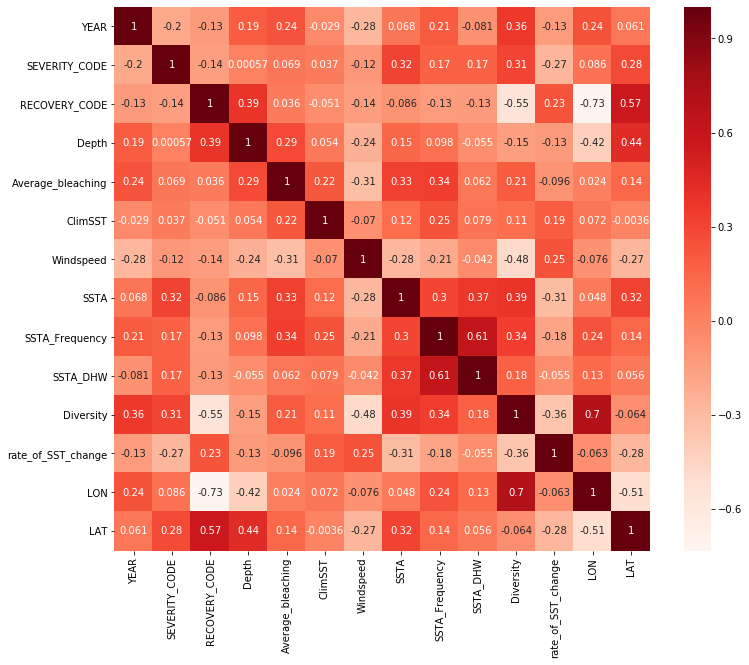

In [106]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [107]:
#df['YEAR']=df['YEAR'].unique().sort()
df=df[df.SEVERITY_CODE !=-1]
df['SEVERITY_CODE'].unique()

array([0., 1., 3., 2.])

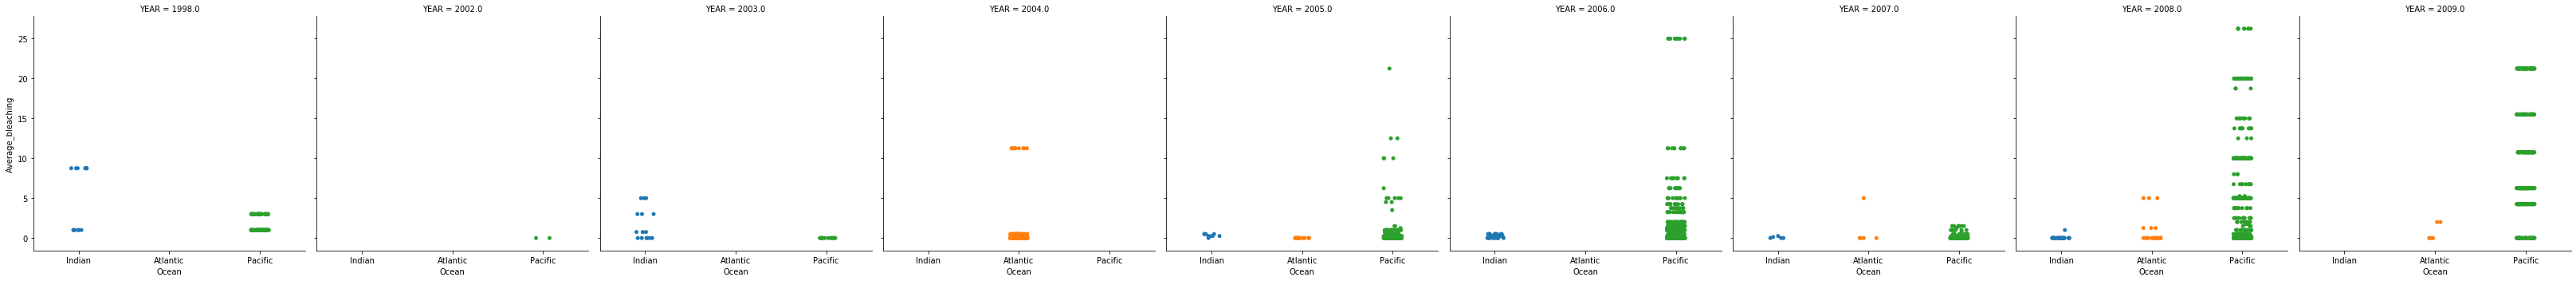

In [108]:
sns.catplot(x="Ocean", y="Average_bleaching", data=df,col="YEAR");

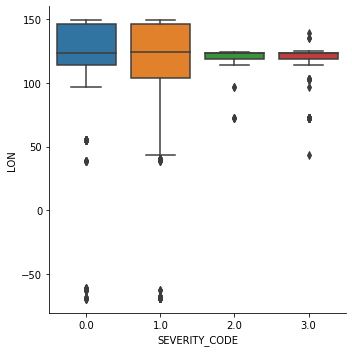

In [109]:
sns.catplot(x="SEVERITY_CODE", y="LON",kind="box" ,data=df);

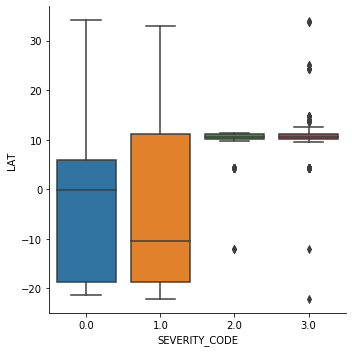

In [110]:
sns.catplot(x="SEVERITY_CODE", y="LAT",kind="box" ,data=df);

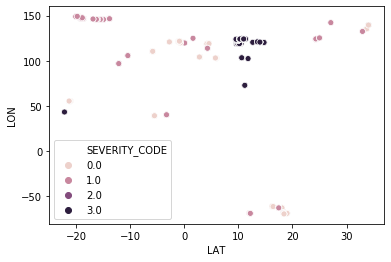

In [111]:
sns.scatterplot(x="LAT", y="LON" ,data=df,hue="SEVERITY_CODE");

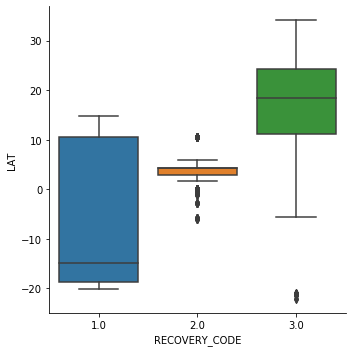

In [112]:
sns.catplot(x="RECOVERY_CODE", y="LAT",kind="box" ,data=df);

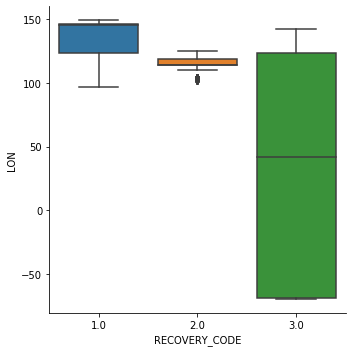

In [113]:
sns.catplot(x="RECOVERY_CODE", y="LON",kind="box" ,data=df);

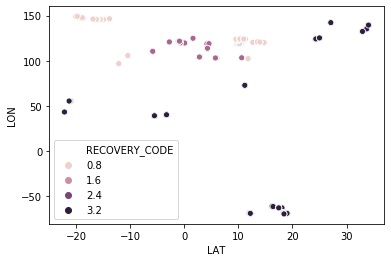

In [114]:
sns.scatterplot(x="LAT", y="LON" ,data=df,hue="RECOVERY_CODE");

Text(0.5, 1.0, 'Sea Surface Temp  vs Longitude')

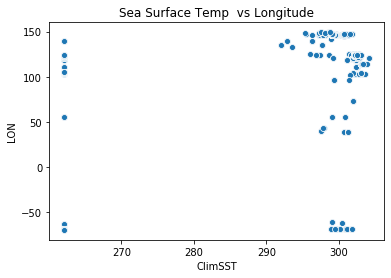

In [119]:
sns.scatterplot(x="ClimSST", y="LON",data=df);
plt.title("Sea Surface Temp  vs Longitude")

Text(0.5, 1.0, 'Sea Surface Temp  vs Latitude')

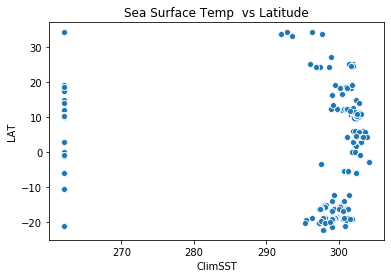

In [121]:
sns.scatterplot(x="ClimSST", y="LAT",data=df);
plt.title("Sea Surface Temp  vs Latitude")

Text(0.5, 1.0, 'Diversity  vs Latitude')

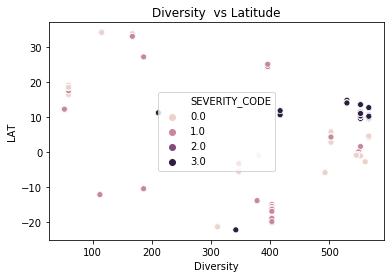

In [123]:
sns.scatterplot(x="Diversity", y="LAT",data=df,hue="SEVERITY_CODE");
plt.title("Diversity  vs Latitude")

Text(0.5, 1.0, 'Diversity  vs Latitude')

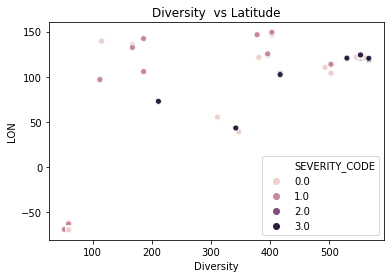

In [124]:
sns.scatterplot(x="Diversity", y="LON",data=df,hue="SEVERITY_CODE");
plt.title("Diversity  vs Latitude")

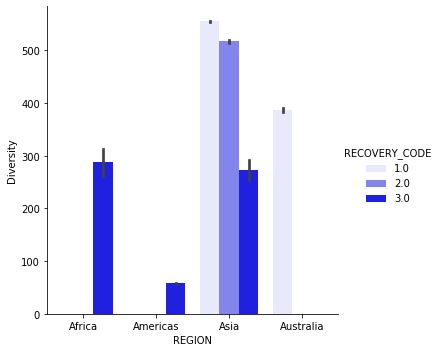

In [363]:
sns.catplot(x="REGION", y="Diversity", hue="RECOVERY_CODE", kind="bar", data=df,color='B');
plt.title("Region-wise Recovery Code VS Diversity")

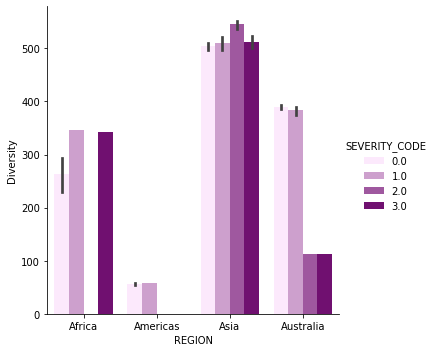

In [327]:
sns.catplot(x="REGION", y="Diversity", hue="SEVERITY_CODE", kind="bar", data=df,color='purple',);

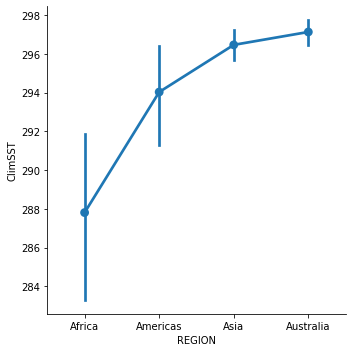

In [83]:
sns.catplot(x="REGION", y="ClimSST", kind="point",data=df);
